# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Agus Rahmat Akmaluddin
- Email: agusrahmat.akmaluddin@gmail.com
- Id Dicoding: agus_rahmat_a

## Menentukan Pertanyaan Bisnis

1. Bagaimana *registered user* dan *casual user* menggunakan sepeda secara berbeda?
2. Bagaimana promosi yang tepat agar user bisa mengalami peningkatan, baik dari *non-user* menjadi *casual user*, dan dari *casual user* menjadi *registered user*?

## Menyiapkan semua *library* yang dibutuhkan

In [ ]:
# menyiapkan semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# mengupload file day.csv dan hour.csv ke google colab
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (1).csv
Saving hour.csv to hour (1).csv


In [ ]:
# memuat tabel day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# memuat tabel hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
# menilai data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


temuan masalah : nilai kolom **dteday** tercatat sebagai **object**, harusnya sebagai **datetime**

In [ ]:
# memeriksa missing value day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# memeriksa duplikasi data day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# menampilkan ringkasan statistik day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# menilai data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


temuan masalah : nilai kolom **dteday** tercatat sebagai **object**, harusnya sebagai **datetime**

In [ ]:
# memeriksa missing value hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# memeriksa duplikasi data hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# menampilkan ringkasan statistik hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Ringkasan assessing data :
1.   day_df
  * nilai pada kolom dteday tercatat sebagai object, harusnya sebagai datetime
2.   hour_df
  * nilai pada kolom dteday tercatat sebagai object, harusnya sebagai datetime

### Cleaning Data

In [ ]:
# membersihkan data day_df

# mengganti judul kolom dteday menjadi dateday
# mengganti judul kolom yr menjadi year
# mengganti judul kolom weekday menjadi wkday
# mengganti judul kolom cnt menjadi total_user
day_df.columns = ["instant", "dateday", "season", "year", "mnth", "holiday", "wkday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "total_user"]

# mengganti tipe data pada kolom dteday menjadi datetime
datetime_columns = ["dateday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

# membuat kolom baru month yang berisikan nama-nama bulan yang merupakan perubahan dari kolom mnth
import calendar
def angka_ke_bulan(angka):
    return calendar.month_name[angka]
day_df['month'] = day_df['mnth'].apply(angka_ke_bulan)
# membuat kolom month jadi berurutan dari Januari sampai Desember
day_df["month"] = pd.Categorical(day_df["month"], categories=[
    "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"
], ordered=True)

# membuat kolom baru weekday yang berisikan nama-nama hari yang merupakan perubahan dari kolom wkday
day_df["weekday"] = day_df["wkday"].replace({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})
# membuat kolom weekday jadi berurutan dari Minggu sampai Sabtu
day_df["weekday"] = pd.Categorical(day_df["weekday"], categories=[
    "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"
], ordered=True)

print(day_df)

     instant    dateday  season  year  mnth  holiday  wkday  workingday  \
0          1 2011-01-01       1     0     1        0      6           0   
1          2 2011-01-02       1     0     1        0      0           0   
2          3 2011-01-03       1     0     1        0      1           1   
3          4 2011-01-04       1     0     1        0      2           1   
4          5 2011-01-05       1     0     1        0      3           1   
..       ...        ...     ...   ...   ...      ...    ...         ...   
726      727 2012-12-27       1     1    12        0      4           1   
727      728 2012-12-28       1     1    12        0      5           1   
728      729 2012-12-29       1     1    12        0      6           0   
729      730 2012-12-30       1     1    12        0      0           0   
730      731 2012-12-31       1     1    12        0      1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.

In [ ]:
# membersihkan data hour_df

# mengganti judul kolom dteday menjadi dateday
# mengganti judul kolom yr menjadi year
# mengganti judul kolom hr menjadi hour
# mengganti judul kolom weekday menjadi wkday
# mengganti judul kolom cnt menjadi total_user
hour_df.columns = ["instant", "dateday", "season", "year", "mnth", "hour", "holiday", "wkday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "total_user"]

# mengganti tipe data pada kolom dteday menjadi datetime
datetime_columns = ["dateday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

# membuat kolom baru month yang berisikan nama-nama bulan yang merupakan perubahan dari kolom mnth
import calendar
def angka_ke_bulan(angka):
    return calendar.month_name[angka]
hour_df['month'] = hour_df['mnth'].apply(angka_ke_bulan)
# membuat kolom month jadi berurutan dari Januari sampai Desember
hour_df["month"] = pd.Categorical(hour_df["month"], categories=[
    "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"
], ordered=True)

# membuat kolom baru weekday yang berisikan nama-nama hari yang merupakan perubahan dari kolom wkday
hour_df["weekday"] = hour_df["wkday"].replace({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})
# membuat kolom weekday jadi berurutan dari Minggu sampai Sabtu
hour_df["weekday"] = pd.Categorical(hour_df["weekday"], categories=[
    "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"
], ordered=True)

print(hour_df)

       instant    dateday  season  year  mnth  hour  holiday  wkday  \
0            1 2011-01-01       1     0     1     0        0      6   
1            2 2011-01-01       1     0     1     1        0      6   
2            3 2011-01-01       1     0     1     2        0      6   
3            4 2011-01-01       1     0     1     3        0      6   
4            5 2011-01-01       1     0     1     4        0      6   
...        ...        ...     ...   ...   ...   ...      ...    ...   
17374    17375 2012-12-31       1     1    12    19        0      1   
17375    17376 2012-12-31       1     1    12    20        0      1   
17376    17377 2012-12-31       1     1    12    21        0      1   
17377    17378 2012-12-31       1     1    12    22        0      1   
17378    17379 2012-12-31       1     1    12    23        0      1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1  

## Exploratory Data Analysis (EDA)

### Explore Data

In [ ]:
# mengeksplorasi data day_df
# melihat penggunaan user berdasarkan tahun dan bulan
day_df.groupby(by=["year", "month"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_user": "sum"
})

casual  registered  total_user
year month                                    
0    January      3073       35116       38189
     February     6242       41973       48215
     March       12826       51219       64045
     April       22346       72524       94870
     May         31050      104771      135821
     June        30612      112900      143512
     July        36452      104889      141341
     August      28842      107849      136691
     September   26545      100873      127418
     October     25222       98289      123511
     November    15594       86573      102167
     December     8448       78875       87323
1    January      8969       87775       96744
     February     8721       94416      103137
     March       31618      133257      164875
     April       38456      135768      174224
     May         44235      151630      195865
     June        43294      159536      202830
     July        41705      161902      203607
     August      43197      171306      214503
     September   43778      174795      218573
     October     34538      164303      198841
     November    21009      131655      152664
     December    13245      110468      123713

Rangkuman :
Terdapat adanya pola dimana periode Desember-Januari-Februari (musim dingin), terjadi penurunan jumlah user. Lalu jumlah mulai naik lagi ketika memasuki Maret-April-Juni (musim semi). Kemudian terjadi puncak user terbanyak adalah periode Juli-Agustus-September (musim panas).

In [ ]:
# mengeksplorasi data day_df
# melihat persebaran user berdasarkan hari
day_df.groupby(by=["weekday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_user": "sum"
})

,casual,registered,total_user
weekday,,,
Sunday,140521,303506,444027
Monday,70784,384719,455503
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048
Thursday,61460,423935,485395
Friday,78238,409552,487790
Saturday,153852,323955,477807


Rangkuman :
Keterangan Penggunaan terbanyak untuk *casual user* adalah akhir pekan, Sabtu dan Minggu. Sedangkan untuk *registered user*, penggunaan terbanyak adalah pada hari Kamis.

In [ ]:
# mengeksplorasi data day_df
# melihat persebaran user berdasarkan weathersit atau keadaan cuaca
day_df.groupby(by=["weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_user": "sum"
})

,casual,registered,total_user
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


Rangkuman :
Keterangan 1 adalah cerah dan atau sebagian berawan atau kondisi dimana matahari masih terlihat, lalu 2 adalah berkabut dan atau mendung dimana matahari tidak terlihat sama sekali tetapi tidak hujan, sedangkan 3 adalah kondisi dimana hujan ringan atau hujan sedang, dan 4 adalah hujan lebat, badai, dan atau salju.
Terdapat informasi bahwa penggunaan terbanyak adalah daam kondisi 1 atau cerah, lalu untuk kondisi 2 atau mendung dan sedikit berkabut masih cukup banyak penggunaan, dan masih ada yang menggunakan dimana hari sedang dalam kondisi 3 atau hujan. Untuk kondisi 4 atau hujan lebat, atau salju, tidak ada penggunaan sama sekali.

In [ ]:
# mengeksplorasi data hour_df
# melihat penggunaan user berdasarkan jam
hour_df.groupby(by=["hour"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_user": "sum"
})

,casual,registered,total_user
hour,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


Rangkuman :
Untuk *casual user*, penggunaan terbanyak adalah pada jam siang sampai sore, yaitu jam 13 sampai 17. Sedangkan penggunaan terbanyak untuk *registered user* adalah pada pagi jam 8 dan sore jam 17 dan jam 18. Sehingga bisa disimpulkan bahwa penggunaan *registered user* dipergunakan untuk keperluan aktivitas berangkat kerja/sekolah dan pulang kerja/sekolah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana *registered user* dan *casual user* menggunakan sepeda secara berbeda?

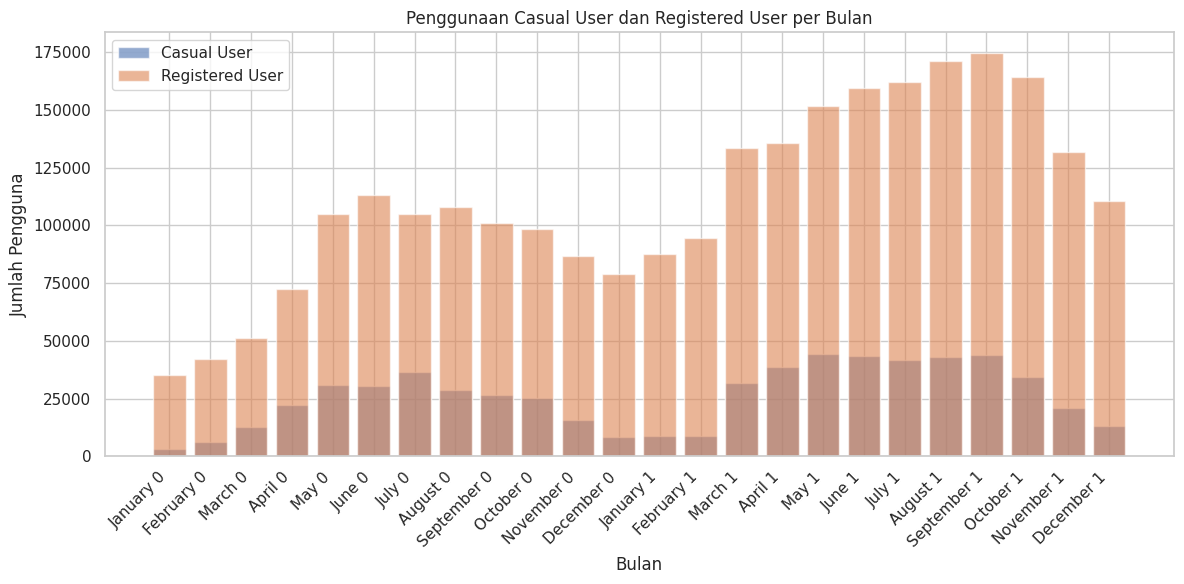

In [ ]:
# membuat bar chart terkait penggunaan casual user dan registered user per bulan
# menggunakan data yang telah dihitung sebelumnya
bybulan_df = day_df.groupby(by=["year", "month"]).agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

# membuat keterangan bulan
bulan_keterangan = [
    f"{month} {year}" for year, month in zip(bybulan_df["year"], bybulan_df["month"])
]

# visualisasi menggunakan bar chart terpisah
plt.figure(figsize=(12, 6))

# bar chart untuk casual
plt.bar(bulan_keterangan, bybulan_df['casual'], label='Casual User', alpha=0.6)

# bar chart untuk registered
plt.bar(bulan_keterangan, bybulan_df['registered'], label='Registered User', alpha=0.6)

plt.title('Penggunaan Casual User dan Registered User per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')  # Agar keterangan bulan tidak bertumpuk
plt.legend()
plt.tight_layout()
plt.show()

Rangkuman :
Terdapat adanya pola dimana periode Desember-Januari-Februari (musim dingin), terjadi penurunan jumlah user. Lalu jumlah mulai naik lagi ketika memasuki Maret-April-Juni (musim semi). Kemudian terjadi puncak user terbanyak adalah periode Juli-Agustus-September (musim panas). Jika dilihat secara tren per tahun, terdapat adanya kenaikan dari tahun pertama dibandingkan tahun kedua.

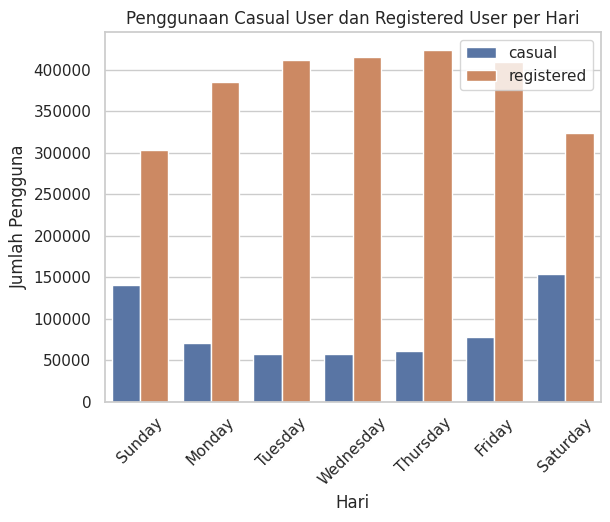

In [ ]:
# membuat bar chart terkait penggunaan casual user dan registered user per hari
# menggunakan data yang telah dihitung sebelumnya
byhari_df = day_df.groupby(by=["weekday"]).agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

# membuat bar chart
sns.set(style='whitegrid')
sns.barplot(x='weekday', y='value', hue='variable', data=pd.melt(byhari_df, ['weekday']))

plt.title('Penggunaan Casual User dan Registered User per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Rangkuman :
Penggunaan terbanyak untuk *casual user* adalah akhir pekan, Sabtu dan Minggu. Sedangkan untuk *registered user*, penggunaan terbanyak adalah pada hari Kamis.

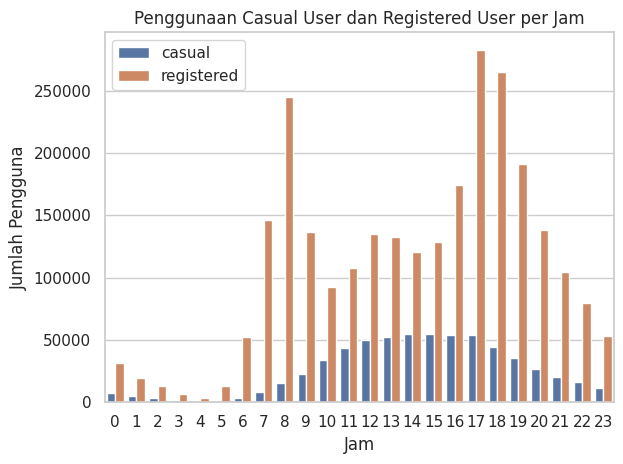

In [ ]:
# membuat bar chart terkait penggunaan casual user dan registered user per jam
# menggunakan data yang telah dihitung sebelumnya
byjam_df = hour_df.groupby(by=["hour"]).agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

# membuat bar chart
sns.set(style='whitegrid')
sns.barplot(x="hour", y='value', hue='variable', data=pd.melt(byjam_df, ["hour"]))

plt.title('Penggunaan Casual User dan Registered User per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.xticks()
plt.legend()
plt.tight_layout()
plt.show()

Rangkuman : Untuk *casual user*, penggunaan terbanyak adalah pada jam siang sampai sore, yaitu jam 13 sampai 17. Sedangkan penggunaan terbanyak untuk *registered user* adalah pada pagi jam 8 dan sore jam 17 dan jam 18. Sehingga bisa disimpulkan bahwa penggunaan registered user dipergunakan untuk keperluan aktivitas berangkat kerja/sekolah dan pulang kerja/sekolah.

### Pertanyaan 2: Bagaimana promosi yang tepat agar user bisa mengalami peningkatan, baik dari *non-user* menjadi *casual user*, dan dari *casual user* menjadi *registered user*?

Berdasarkan rangkuman dari penggunaan baik dari casual user maupun dari registered user, bisa dilihat beberapa poin promosi yang dapat dilakukan :
*  Berdasarkan data penggunaan per bulan, bisa dilihat terdapat adanya pola dimana periode Desember-Januari-Februari (musim dingin), terjadi penurunan jumlah user. Lalu jumlah mulai naik lagi ketika memasuki Maret-April-Juni (musim semi). Kemudian terjadi puncak user terbanyak adalah periode Juli-Agustus-September (musim panas). **Oleh karena itu, kegiatan promosi dilakukan pada masa-masa musim dingin dimana penggunanya tidak terlalu banyak.**
*  Berdasarkan data penggunaan per hari, penggunaan terbanyak untuk *casual user* adalah akhir pekan, Sabtu dan Minggu. Sedangkan untuk *registered user*, penggunaan terbanyak adalah pada hari Kamis. **Oleh karena itu, promosi untuk registered user di waktu akhir pekan.**
*  Berdasarakan data penggunaan per jam, untuk casual user, penggunaan terbanyak adalah pada jam siang sampai sore, yaitu jam 13 sampai 17. Sedangkan penggunaan terbanyak untuk registered user adalah pada pagi jam 8 dan sore jam 17 dan jam 18. Sehingga bisa disimpulkan bahwa penggunaan registered user dipergunakan untuk keperluan aktivitas berangkat kerja/sekolah dan pulang kerja/sekolah. **Oleh karena itu, bisa dilakukan kegiatan promosi misal *happy hour* untuk *casual user* dari jam 9 pagi sampai jam 12.**



## Conclusion

- Berdasarkan data penggunaan per bulan, bisa dilihat terdapat adanya pola dimana periode Desember-Januari-Februari (musim dingin), terjadi penurunan jumlah user. Lalu jumlah mulai naik lagi ketika memasuki Maret-April-Juni (musim semi). Kemudian terjadi puncak user terbanyak adalah periode Juli-Agustus-September (musim panas). **Oleh karena itu, kegiatan promosi dilakukan pada masa-masa musim dingin dimana penggunanya tidak terlalu banyak.**

- Berdasarkan data penggunaan per hari, penggunaan terbanyak untuk *casual user* adalah akhir pekan, Sabtu dan Minggu. Sedangkan untuk *registered user*, penggunaan terbanyak adalah pada hari Kamis. **Oleh karena itu, promosi untuk *registered user* di waktu akhir pekan.**

- Berdasarkan data penggunaan per jam, untuk *casual user*, penggunaan terbanyak adalah pada jam siang sampai sore, yaitu jam 13 sampai 17. Sedangkan penggunaan terbanyak untuk *registered user* adalah pada pagi jam 8 dan sore jam 17 dan jam 18. Sehingga bisa disimpulkan bahwa penggunaan registered user dipergunakan untuk keperluan aktivitas berangkat kerja/sekolah dan pulang kerja/sekolah. **Oleh karena itu, bisa dilakukan kegiatan promosi misal *happy hour* untuk *casual user* dari jam 9 pagi sampai jam 12.**